In [56]:
import pandas_datareader as web
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib as plt 

In [57]:
df= pd.read_excel("returns.xlsx",index_col = "Date")

In [58]:
df = df.iloc[::-1]

In [59]:
ewma_cov = df.ewm(com=0.94).cov()

In [60]:
ewma_cov = ewma_cov.iloc[::-1]

In [61]:
ewma_cov

^FCHI    BNP.PA     AI.PA     RI.PA         ^GSPC  \
Date                                                                           
2020-02-14 GBP5Y    1.402630e-02  0.014531  0.029115 -0.032839  2.309017e-03   
           GBP3Y    1.374567e-02  0.015605  0.026736 -0.031724  2.700716e-03   
           GBP2Y    1.270532e-02  0.014819  0.024830 -0.029473  2.391050e-03   
           GBP1Y    9.383296e-03  0.011179  0.020071 -0.021749  1.245583e-03   
           USD10Y   1.252714e-02  0.014909  0.021034 -0.018146  4.242145e-03   
           USD7Y    1.630351e-02  0.021785  0.020201 -0.026195  6.860106e-03   
           USD5Y    1.333981e-02  0.018455  0.011244 -0.020861  7.071061e-03   
           USD3Y    1.219854e-02  0.014166  0.024120 -0.020206  2.632456e-03   
           USD2Y    1.286533e-02  0.016434  0.026255 -0.020817  2.215118e-03   
           USD1Y    2.425808e-03  0.007091 -0.001694  0.003956  1.785587e-03   
           USD6MTH -1.827585e-04 -0.002928 -0.005180 -0.003821  1.350807e-03   
           USD3MTH  2.839369e-03 -0.000345  0.008877 -0.010938  1.550675e-04   
           EUR10Y   8.617188e-03  0.007605  0.016369 -0.016706  2.622176e-03   
           EUR7Y    7.966468e-03  0.006418  0.016775 -0.017276  1.840618e-03   
           EUR5Y    7.080421e-03  0.005341  0.015890 -0.016377  1.318028e-03   
           EUR3Y    5.331544e-03  0.003823  0.012091 -0.012267  1.001334e-03   
           EUR2Y    3.778208e-03  0.002669  0.007877 -0.008091  9.770830e-04   
           EUR1Y    1.348615e-03  0.000905  0.000914 -0.002099  1.006900e-03   
           EUR6MTH -3.782374e-04 -0.000377 -0.004042  0.001544  9.952638e-04   
           EUR3MTH -1.416348e-03 -0.001165 -0.006990  0.003487  9.663296e-04   
           GBP/EUR  6.299506e-06 -0.000006  0.000043 -0.000028 -7.092737e-06   
           USD/EUR  9.472437e-07 -0.000004  0.000011 -0.000010 -2.391499e-06   
           BAS      3.762882e-05  0.000070 -0.000012 -0.000043  3.617068e-05   
           DPW      3.522325e-05  0.000038  0.000094 -0.000062  6.274866e-07   
           ADS      2.444633e-05  0.000051 -0.000027 -0.000023  2.390433e-05   
           ^GDAXI   2.506856e-05  0.000035  0.000034 -0.000034  1.032721e-05   
           BA       7.032869e-05  0.000065  0.000244 -0.000174 -1.740899e-05   
           VOD      5.803797e-05  0.000087  0.000080 -0.000136  1.166398e-05   
           BATS     2.078366e-06  0.000001  0.000033  0.000018 -3.543220e-06   
           SDR     -1.201895e-05  0.000007 -0.000058  0.000072  1.271983e-05   
...                          ...       ...       ...       ...           ...   
2007-12-31 EUR2Y             NaN       NaN       NaN       NaN           NaN   
           EUR1Y             NaN       NaN       NaN       NaN           NaN   
           EUR6MTH           NaN       NaN       NaN       NaN           NaN   
           EUR3MTH           NaN       NaN       NaN       NaN           NaN   
           GBP/EUR           NaN       NaN       NaN       NaN           NaN   
           USD/EUR           NaN       NaN       NaN       NaN           NaN   
           BAS               NaN       NaN       NaN       NaN           NaN   
           DPW               NaN       NaN       NaN       NaN           NaN   
           ADS               NaN       NaN       NaN       NaN           NaN   
           ^GDAXI            NaN       NaN       NaN       NaN           NaN   
           BA                NaN       NaN       NaN       NaN           NaN   
           VOD               NaN       NaN       NaN       NaN           NaN   
           BATS              NaN       NaN       NaN       NaN           NaN   
           SDR               NaN       NaN       NaN       NaN           NaN   
           EZJ               NaN       NaN       NaN       NaN           NaN   
           ^FTSE             NaN       NaN       NaN       NaN           NaN   
           F                 NaN       NaN       NaN       NaN           NaN   
           GE              

In [62]:
ewma_cov.index.droplevel() == "^FCHI"

array([False, False, False, ..., False, False,  True])

In [63]:
ewma_cov[ewma_cov.index.droplevel() == "^FCHI"][["^FCHI"]].dropna().unstack().index

DatetimeIndex(['2020-02-14', '2020-02-13', '2020-02-12', '2020-02-11',
               '2020-02-10', '2020-02-07', '2020-02-06', '2020-02-05',
               '2020-02-04', '2020-02-03',
               ...
               '2008-01-15', '2008-01-14', '2008-01-11', '2008-01-10',
               '2008-01-09', '2008-01-08', '2008-01-07', '2008-01-04',
               '2008-01-03', '2008-01-02'],
              dtype='datetime64[ns]', name='Date', length=3065, freq=None)

In [64]:
df = df.iloc[::-1]

In [65]:
betas = pd.DataFrame(ewma_cov[ewma_cov.index.droplevel() == "RI.PA"][["^FCHI"]].dropna()["^FCHI"].values/ewma_cov[ewma_cov.index.droplevel() == "^FCHI"][["^FCHI"]].dropna()["^FCHI"].values,columns=["RI.PA"],index = ewma_cov[ewma_cov.index.droplevel() == "^FCHI"][["^FCHI"]].dropna().unstack().index)

In [66]:
tickers_fr = ['BNP.PA', 'AI.PA', 'RI.PA']
tickers_us = ['ROST', 'AAPL', 'MA','ANSS', 'TSCO', 'NFLX', 'AMD', 'GE', 'F']
ticker_uk = ['EZJ', 'SDR', 'BATS','VOD', 'BA']
ticker_de = ['ADS', 'DPW', 'BAS']

In [67]:
betas_fr = pd.DataFrame()
for ticker in tickers_fr:
    betas_fr[ticker] = ewma_cov[ewma_cov.index.droplevel() == ticker][["^FCHI"]].dropna()["^FCHI"].values/ewma_cov[ewma_cov.index.droplevel() == "^FCHI"][["^FCHI"]].dropna()["^FCHI"].values

In [68]:
betas_fr.index = ewma_cov[ewma_cov.index.droplevel() == "^FCHI"][["^FCHI"]].dropna().unstack().index

In [69]:
betas_us = pd.DataFrame()
for ticker in tickers_us:
    betas_us[ticker] = ewma_cov[ewma_cov.index.droplevel() == ticker][["^GSPC"]].dropna()["^GSPC"].values/ewma_cov[ewma_cov.index.droplevel() == "^GSPC"][["^GSPC"]].dropna()["^GSPC"].values

In [70]:
 betas_us.index = ewma_cov[ewma_cov.index.droplevel() == "^FCHI"][["^FCHI"]].dropna().unstack().index

In [71]:
betas_uk = pd.DataFrame()
for ticker in ticker_uk:
    betas_uk[ticker] = ewma_cov[ewma_cov.index.droplevel() == ticker][["^FTSE"]].dropna()["^FTSE"].values/ewma_cov[ewma_cov.index.droplevel() == "^FTSE"][["^FTSE"]].dropna()["^FTSE"].values

In [72]:
betas_uk.index = ewma_cov[ewma_cov.index.droplevel() == "^FCHI"][["^FCHI"]].dropna().unstack().index

In [73]:
betas_de = pd.DataFrame()
for ticker in ticker_de:
    betas_de[ticker] = ewma_cov[ewma_cov.index.droplevel() == ticker][["^FTSE"]].dropna()["^FTSE"].values/ewma_cov[ewma_cov.index.droplevel() == "^FTSE"][["^FTSE"]].dropna()["^FTSE"].values

In [74]:
betas_de.index = ewma_cov[ewma_cov.index.droplevel() == "^FCHI"][["^FCHI"]].dropna().unstack().index

In [75]:
betas = pd.concat([betas_fr,betas_us,betas_uk,betas_de],axis=1)

In [76]:
betas

,BNP.PA,AI.PA,RI.PA,ROST,AAPL,MA,ANSS,TSCO,NFLX,AMD,GE,F,EZJ,SDR,BATS,VOD,BA,ADS,DPW,BAS
Date,,,,,,,,,,,,,,,,,,,,
2020-02-14,1.341849,1.501856,-1.767726,0.272978,2.940573,0.772671,1.578599,1.302201,1.195991,0.180563,3.824809,0.684060,1.171613,0.498107,0.050522,1.077654,0.285204,1.041701,0.445420,1.599262
2020-02-13,1.659366,0.372954,-1.102918,0.209305,2.976876,0.650059,1.618301,1.351041,1.341408,0.168593,3.923669,0.986684,1.247401,0.686872,0.002886,0.916284,-0.263912,1.153497,0.272885,1.700574
2020-02-12,1.024791,0.923300,-0.094723,0.317832,3.109572,1.300781,1.074423,0.941450,1.367062,-0.322774,2.890202,1.069497,3.184488,-0.186807,0.052654,1.160282,1.089214,1.384072,1.664300,1.023857
2020-02-11,1.391279,2.015720,1.869229,0.910480,1.688825,1.115565,0.501654,0.790213,0.873548,2.218502,1.516133,-0.592439,4.435340,0.354786,0.601050,0.677298,1.272481,0.968320,1.697951,0.877598
2020-02-10,0.857675,0.657037,2.286831,1.237006,1.571736,1.119253,0.632900,0.569346,0.948954,2.399235,1.369926,-0.090337,2.623270,0.890373,1.172834,0.349912,0.711434,0.891367,1.535061,1.165016
2020-02-07,-0.563927,0.670204,3.526651,1.314859,1.888969,0.845445,0.514742,0.751840,0.665830,0.357084,1.657246,-1.110152,2.502071,1.127990,1.362955,-0.549560,0.314612,0.670421,1.437679,1.409219
2020-02-06,1.177570,0.290624,6.662736,1.831007,1.521385,0.721903,0.344001,-0.869977,1.438059,2.284795,1.465752,-2.110501,1.647464,1.172545,0.519314,-0.443380,0.303988,1.566821,1.216045,1.424350
2020-02-05,1.145798,0.325880,6.949549,1.282261,2.126024,0.884026,0.835702,-0.113859,0.817927,1.829574,1.469770,-0.970508,0.914356,1.055118,0.698790,0.753737,0.584465,1.592349,1.166422,1.270057
2020-02-04,1.149535,0.315435,7.098047,1.230193,2.316633,1.175759,1.511790,-0.914439,1.253906,2.085081,1.341386,0.821925,0.995751,1.073415,0.651780,0.599199,0.525667,1.549690,1.239157,1.321254


In [77]:
mapping = pd.read_excel("mapping.xlsx",index_col = "risk_factors")

In [ ]:
ewma_cov = ewma_cov.iloc[::-1]
ewma_cov.dropna(inplace=True)

In [134]:
alpha = 0.01

In [137]:
var = pd.DataFrame()
cpt_EUR = []
for num in range(0,3064):
    cpt_EUR.append(norm.ppf(1-alpha) * np.sqrt(np.dot(mapping["exposure_EUR"].T.values,np.dot(ewma_cov.loc[betas.index[num]].values,mapping["exposure_EUR"].values))))

In [138]:
riskmetrics_var = pd.DataFrame(cpt_EUR,columns = ["var_1%_eur"],index = betas.index[0:3064])

In [139]:
cpt_pct = []
for num in range(0,3064):
    cpt_pct.append(norm.ppf(1-alpha) * np.sqrt(np.dot(mapping["exposure_pct"].T.values,np.dot(ewma_cov.loc[betas.index[num]].values,mapping["exposure_pct"].values))))

In [140]:
riskmetrics_var["var_1%_%"] = cpt_pct

In [141]:
riskmetrics_var

,var_1%_eur,var_1%_%
Date,,
2020-02-14,20459.019955,0.017981
2020-02-13,28462.044341,0.025015
2020-02-12,13664.197325,0.012009
2020-02-11,19133.276293,0.016816
2020-02-10,15530.723670,0.013650
2020-02-07,21836.852521,0.019192
2020-02-06,21340.347043,0.018756
2020-02-05,29148.581421,0.025618
2020-02-04,41703.741849,0.036652


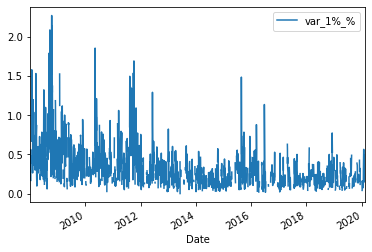

In [94]:
riskmetrics_var[["var_1%_%"]].plot()

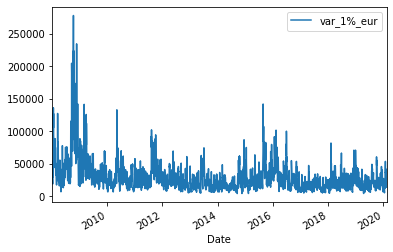

In [142]:
riskmetrics_var[["var_1%_eur"]].plot()

In [ ]:
total_portfolio_value = 1137816.44

In [41]:
portfolio_rt_bin = []
for date in df.index:
    portfolio_rt_bin.append(np.dot(df.loc[date].values,mapping["total_exposure"].values)/total_portfolio_value)

In [43]:
portfolio = pd.DataFrame(portfolio_rt_bin,columns=["portfolio_returns"],index = df.index)

In [45]:
portfolio_mapped_rt_bin = []
for date in df.index:
    portfolio_mapped_rt_bin.append(np.dot(df.loc[date].values,mapping["mapped_exposure"].values)/total_portfolio_value)

In [46]:
portfolio["mapped_portfolio_returns"] = portfolio_mapped_rt_bin

In [49]:
portfolio.dropna(inplace=True)

In [50]:
portfolio

,portfolio_returns,mapped_portfolio_returns
Date,,
2020-02-14,-0.000514,0.000189
2020-02-13,-0.000807,0.000028
2020-02-12,0.005778,0.002521
2020-02-11,0.002303,0.001151
2020-02-10,-0.002105,0.003168
2020-02-07,0.002164,-0.000981
2020-02-06,0.005827,0.000649
2020-02-05,0.000211,0.003363
2020-02-04,-0.001649,0.005656


In [ ]:
from scipy.special import beta
import numpy as np
from math import sqrt
from typing import Union
from scipy import integrate

# Generalised Student T probability Distribution
def generalized_student_t(x:Union[float, np.ndarray], mu:float, sigma:float, 
                          lam:float, p:float, q:float) \
        -> Union[float, np.ndarray]:


    v = q**(-1/p) * ((3*lam**2 + 1)*(beta(3/p, q - 2/p)/beta(1/p,q)) - 4*lam**2*(beta(2/p, q - 1/p)/beta(1/p,q))**2)**(-1/2)

    m = 2*v*sigma*lam*q**(1/p)*beta(2/p,q - 1/p)/beta(1/p,q)   

    fx = p  / (2*v*sigma*q**(1/p)*beta(1/p,q)*(abs(x-mu+m)**p/(q*(v*sigma)**p)*(lam*np.sign(x-mu+m)+1)**p + 1)**(1/p + q))

    return fx